In [15]:
from neuralprophet import NeuralProphet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
f=pd.read_csv('implementation1.csv')
f

,Year,Tender,Project,Cummulative without tool,Cummulative with tool,Net Reduction,Program Description,ROI(%)
0,01 January 2021,0,1,40,24,16,auxillary transformer sizing,66.67%
1,01 February 2021,7,2,132,88,44,conductor ampacity sizing,50.00%
2,01 March 2021,0,0,0,0,0,conductor sizing flexible bus,#DIV/0!
3,01 April 2021,0,0,0,0,0,conductor sizing rigid bus,#DIV/0!
4,01 May 2021,0,1,24,16,8,diesel generator sizing,50.00%
5,01 June 2021,3,3,192,120,72,instrument transformer sizing,60.00%
6,01 July 2021,2,0,48,24,24,lightning protection-rolling shpere,100.00%
7,01 August 2021,0,2,128,80,48,lvac cable sizing,60.00%
8,01 September 2021,0,2,64,40,24,lvdc cable sizing,60.00%
9,01 October 2021,3,2,112,76,36,maximum span and cantilever strength calculation,47.37%


In [5]:
f.dtypes

Year                        object
Tender                       int64
Project                      int64
Cummulative without tool     int64
Cummulative with tool        int64
Net Reduction                int64
Program Description         object
ROI(%)                      object
dtype: object

In [6]:
f['Year']=pd.to_datetime(f['Year'],dayfirst='True')
f.dtypes

Year                        datetime64[ns]
Tender                               int64
Project                              int64
Cummulative without tool             int64
Cummulative with tool                int64
Net Reduction                        int64
Program Description                 object
ROI(%)                              object
dtype: object

In [7]:
f1=f[['Year','Net Reduction']]
f1.columns=['ds','y']
f1

,ds,y
0,2021-01-01,16
1,2021-02-01,44
2,2021-03-01,0
3,2021-04-01,0
4,2021-05-01,8
5,2021-06-01,72
6,2021-07-01,24
7,2021-08-01,48
8,2021-09-01,24
9,2021-10-01,36


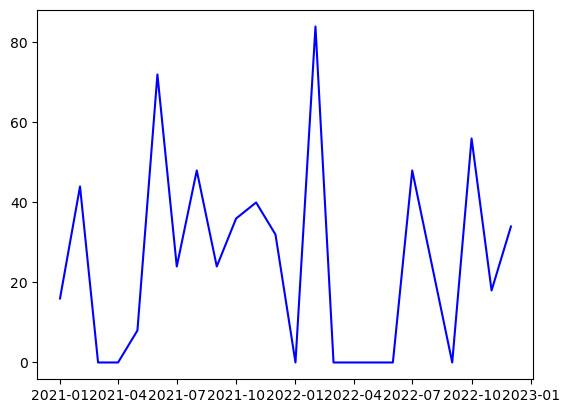

In [8]:
plt.plot(f1['ds'],f1['y'],c='b')
plt.show()

In [9]:
model=NeuralProphet()
model.fit(f1)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (3) is too small than the required number                     for the learning rate finder (202). The results might not be optimal.


Finding best initial lr:   0%|          | 0/202 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\pytorch_lightning\utilities\data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.168392,0.0,24.822563,29.176031,0.168392,0.0,0
1,0.162672,0.0,24.136892,28.467073,0.162672,0.0,1
2,0.158292,0.0,23.548340,27.512411,0.158292,0.0,2
3,0.153454,0.0,22.843704,27.134581,0.153454,0.0,3
4,0.148581,0.0,22.216179,26.016449,0.148581,0.0,4
...,...,...,...,...,...,...,...
455,0.091607,0.0,15.380627,21.092443,0.091607,0.0,455
456,0.091609,0.0,15.380737,20.430994,0.091609,0.0,456
457,0.091603,0.0,15.379715,20.179733,0.091603,0.0,457
458,0.091607,0.0,15.381169,20.278540,0.091607,0.0,458


In [10]:
future=model.make_future_dataframe(f1,periods=60)
forecast=model.predict(future)
print(forecast)


WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


           ds     y       yhat1       trend
0  2023-01-01  None   37.146843   37.146843
1  2023-02-01  None   41.023731   41.023731
2  2023-03-01  None   44.525433   44.525433
3  2023-04-01  None   48.402325   48.402325
4  2023-05-01  None   52.154156   52.154156
5  2023-06-01  None   56.031044   56.031044
6  2023-07-01  None   59.782875   59.782875
7  2023-08-01  None   63.659763   63.659763
8  2023-09-01  None   67.536652   67.536652
9  2023-10-01  None   71.288483   71.288483
10 2023-11-01  None   75.165375   75.165375
11 2023-12-01  None   78.917191   78.917191
12 2024-01-01  None   82.794083   82.794083
13 2024-02-01  None   86.670990   86.670990
14 2024-03-01  None   90.297760   90.297760
15 2024-04-01  None   94.174652   94.174652
16 2024-05-01  None   97.926476   97.926476
17 2024-06-01  None  101.803360  101.803360
18 2024-07-01  None  105.555199  105.555199
19 2024-08-01  None  109.432091  109.432091
20 2024-09-01  None  113.308983  113.308983
21 2024-10-01  None  117.060806 

WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


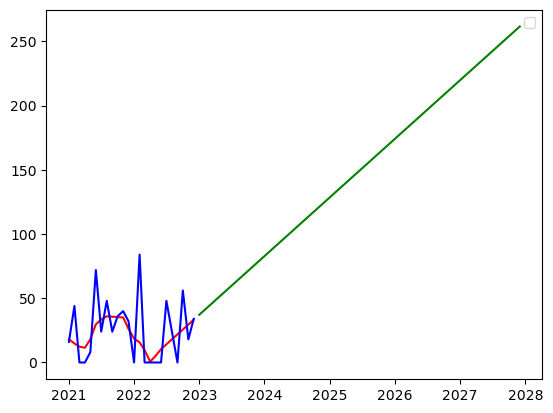

In [11]:
actual_prediction=model.predict(f1)
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],c='r')
plt.plot(forecast['ds'],forecast['yhat1'],c='g')
plt.plot(f1['ds'],f1['y'],c='b')
plt.legend()
plt.show()

In [62]:
f2=f[['Year','Cummulative without tool']]
f2.columns=['ds','y']
f2

,ds,y
0,2021-01-01,40
1,2021-02-01,132
2,2021-03-01,0
3,2021-04-01,0
4,2021-05-01,24
5,2021-06-01,192
6,2021-07-01,48
7,2021-08-01,128
8,2021-09-01,64
9,2021-10-01,112


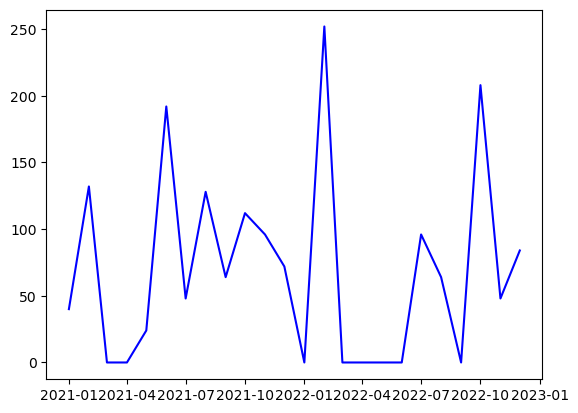

In [64]:
plt.plot(f2['ds'],f2['y'],c='b')
plt.show()

In [65]:
model=NeuralProphet()
model.fit(f2)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as MS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (3) is too small than the required number                     for the learning rate finder (202). The results might not be optimal.


Finding best initial lr:   0%|          | 0/202 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.686756,0.0,205.684326,223.790695,0.686756,0.0,0
1,0.670364,0.0,201.212753,218.781021,0.670364,0.0,1
2,0.651554,0.0,196.463074,214.263138,0.651554,0.0,2
3,0.635262,0.0,191.918777,210.591537,0.635262,0.0,3
4,0.618837,0.0,187.453369,204.455460,0.618837,0.0,4
...,...,...,...,...,...,...,...
455,0.095699,0.0,47.790821,65.995850,0.095699,0.0,455
456,0.095697,0.0,47.791504,62.898296,0.095697,0.0,456
457,0.095696,0.0,47.791431,65.573311,0.095696,0.0,457
458,0.095710,0.0,47.794102,63.698101,0.095710,0.0,458


In [2]:
future=model.make_future_dataframe(f2,periods=60)
forecast=model.predict(future)
print(forecast)

NameError: name 'model' is not defined

WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [95.833]% of the data.
WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - C:\Users\Athish\AppData\Roaming\Python\Python311\site-packages\neuralprophet\df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


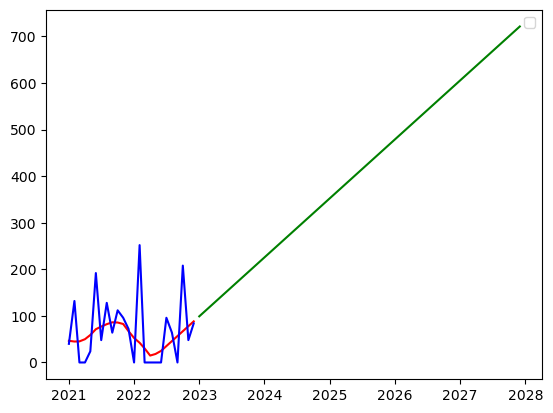

In [67]:
actual_prediction=model.predict(f2)
plt.plot(actual_prediction['ds'],actual_prediction['yhat1'],c='r')
plt.plot(forecast['ds'],forecast['yhat1'],c='g')
plt.plot(f2['ds'],f2['y'],c='b')
plt.legend()
plt.show()

In [12]:
forecast.to_csv('implementation1.csv')